In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
from torch import nn


In [2]:
from sklearn.datasets import load_breast_cancer



In [3]:
data = load_breast_cancer()
X, Y = data.data, data.target

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
type(X)

numpy.ndarray

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target.shape

(569,)

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
len(data.feature_names)

30

In [12]:
print(X.shape)
print(X)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [13]:
print(Y.shape)
print(Y)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [14]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)

In [16]:
X_train.shape

(381, 30)

In [17]:
N, D = X_train.shape

In [18]:
type(X_train)

numpy.ndarray

In [19]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [20]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [21]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
#calculate binary crossentropy loss from logits
#criterion = nn.BCEWithLogitsLoss()

In [22]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1, 1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1, 1))

In [23]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses= np.zeros(n_epochs)

for i in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    loss.backward()
    optimizer.step()

    #Get test loss
    output_test = model(X_test)
    loss_test = criterion(output_test, Y_test)

    #save loss
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()

    #We do not need per epochs results, we can have some results among thousands
    if (i+1) % 50 ==0:
        print(f"Epochs {i+1}/{n_epochs}: Train Loss {loss.item():.4f}, Test Loss {loss_test.item():.4f}")


Epochs 50/1000: Train Loss 0.4014, Test Loss 0.4086
Epochs 100/1000: Train Loss 0.2956, Test Loss 0.3097
Epochs 150/1000: Train Loss 0.2408, Test Loss 0.2565
Epochs 200/1000: Train Loss 0.2065, Test Loss 0.2224
Epochs 250/1000: Train Loss 0.1827, Test Loss 0.1984
Epochs 300/1000: Train Loss 0.1651, Test Loss 0.1804
Epochs 350/1000: Train Loss 0.1517, Test Loss 0.1665
Epochs 400/1000: Train Loss 0.1411, Test Loss 0.1554
Epochs 450/1000: Train Loss 0.1325, Test Loss 0.1463
Epochs 500/1000: Train Loss 0.1255, Test Loss 0.1387
Epochs 550/1000: Train Loss 0.1196, Test Loss 0.1323
Epochs 600/1000: Train Loss 0.1146, Test Loss 0.1268
Epochs 650/1000: Train Loss 0.1103, Test Loss 0.1219
Epochs 700/1000: Train Loss 0.1065, Test Loss 0.1177
Epochs 750/1000: Train Loss 0.1032, Test Loss 0.1139
Epochs 800/1000: Train Loss 0.1003, Test Loss 0.1105
Epochs 850/1000: Train Loss 0.0977, Test Loss 0.1074
Epochs 900/1000: Train Loss 0.0953, Test Loss 0.1046
Epochs 950/1000: Train Loss 0.0932, Test Loss 0

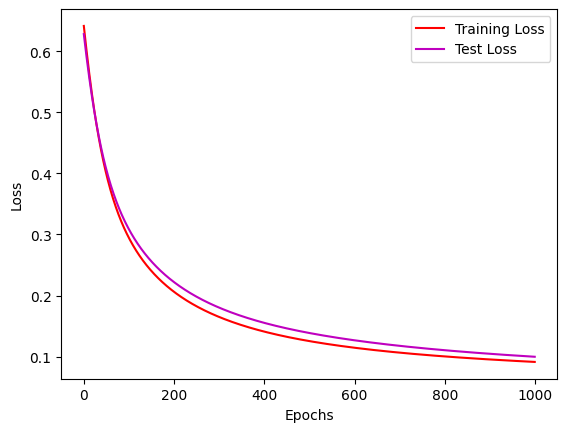

In [24]:
plt.plot(train_losses, 'r', label="Training Loss")
plt.plot(test_losses, 'm', label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
#Accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())

    train_acc = np.mean(Y_train.numpy()==p_train)


    p_test = model(X_test)
    p_test = np.round(p_test.numpy())

    test_acc = np.mean(Y_test.numpy()==p_test)


print(f"Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9869, Testing Accuracy: 0.9840


<h2> Save And Load Model </h2>

In [26]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4159, -0.4190, -0.2540, -0.4960, -0.1688, -0.0296, -0.3591, -0.4403,
                       -0.1947,  0.4980, -0.3878,  0.0316, -0.4674, -0.1725, -0.2338,  0.0888,
                       -0.0756, -0.0421,  0.2216,  0.3832, -0.4323, -0.4052, -0.3499, -0.2544,
                       -0.5115, -0.1024, -0.3181, -0.4713, -0.5283, -0.2496]])),
             ('0.bias', tensor([0.3375]))])

In [27]:
torch.save(model.state_dict(), "mymodel.pt")

In [28]:
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load("mymodel.pt"))

<All keys matched successfully>

In [29]:
model2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4159, -0.4190, -0.2540, -0.4960, -0.1688, -0.0296, -0.3591, -0.4403,
                       -0.1947,  0.4980, -0.3878,  0.0316, -0.4674, -0.1725, -0.2338,  0.0888,
                       -0.0756, -0.0421,  0.2216,  0.3832, -0.4323, -0.4052, -0.3499, -0.2544,
                       -0.5115, -0.1024, -0.3181, -0.4713, -0.5283, -0.2496]])),
             ('0.bias', tensor([0.3375]))])

In [30]:
#Accuracy
with torch.no_grad():
    p_train = model2(X_train)
    p_train = np.round(p_train.numpy())

    train_acc = np.mean(Y_train.numpy()==p_train)


    p_test = model2(X_test)
    p_test = np.round(p_test.numpy())

    test_acc = np.mean(Y_test.numpy()==p_test)


print(f"Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9869, Testing Accuracy: 0.9840
